In [1]:
from ff_k_center import FFKCenter
import numpy as np

Create model with k=4, privacy_bound = 1 and representative intervals (1,13) for color class 0 and no restrictions for other color classes:

In [2]:
model = FFKCenter(4,1,[(1,13)]) # parameters: k, privacy_bound = 1, rep_intervals = []

Load data in for of positions in the Eucleadean space (here dim = 2) and color labels for each point. Normal python arrays or numpy-arrays are fine.
model.fit() loads the data and executes the algorithm afterwards.

In [3]:
pos = np.array([[1,2],[0,0],[6,7],[0,-1],[-2,-3],[0,-1.2],[1,3],[6,1]])
colors = np.array([0,0,0,1,1,0,0,1])
model.fit(pos,colors) # positions of points, followed by colors, Optinal: verbose = False

  - Phase 1 done (time: 1.33µs): Determined k = 4 centers by the Gonzales heuristic.
  - Phase 2 done (time: 96.715µs): Determined k = 4 clusterings.
  - Phase 3 done (time: 36.964µs): Determined opening lists.
  - Phase 4 done (time: 489.713µs with 8 threads on 8 cores): Determined new centers. Number of flow problem solved: 4.
  - Phase 5 done (time: 39.03µs): Created assignments and chose the final clustering (based on C_3).
**** Algorithm done (total time: 667.363µs): Privacy-preserving representative k-center computed. Number of centers: 4; final radius: 2.828427.


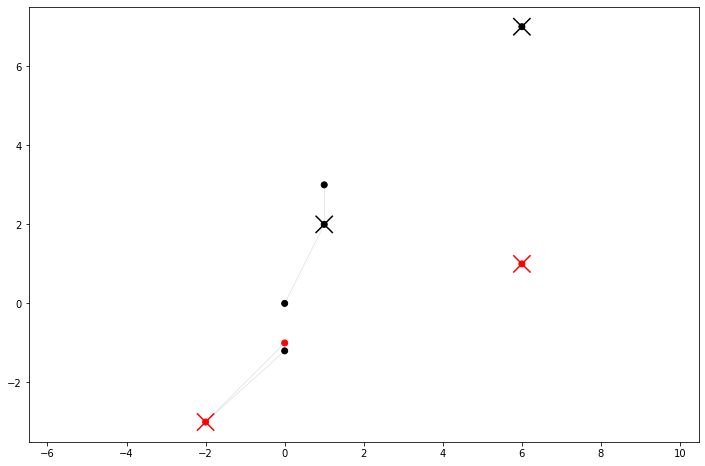

In [4]:
model.plot2d() # for this matplotlib must be installed

In [5]:
model.cluster_labels # for each point a cluster_label (enumerated from 0,...,m)

[0, 0, 1, 2, 2, 2, 0, 3]

In [6]:
model.centers # Chosen centers by the point-index.

[0, 2, 4, 7]

In [7]:
model.assignment # for each point the center it is assigned to.

[0, 0, 2, 4, 4, 4, 0, 7]

It is also possible to read/write the paramters. By writing the clustering is removed and needs to be recomputed via model.compute_clustering().

In [8]:
model.rep_intervals

[(1, 13)]

In [9]:
model.privacy_bound

1

<b>Reuse old model for complete new clustering problem:</b>

In [10]:
model.set_problem_parameters(k=4,rep_intervals=[(1,4),(0,0),(3,4)],privacy_bound=7)
model.load_space_from_file("shifting3.2dspace", expected = 40) # expected is optional. Default is 1000.


**** Successfully loaded 36 points/colors (dimension: 2) from 'shifting3.2dspace'


In [20]:
model.compute_clustering(verbose = 2) # verbose is optional. 0: Silent, 1: Brief, 2: Verbose; Default = 1


**** Solving: Clustering-Problem with k = 4, privacy_bound = 2 and representative_intervals: (1,4), (0,0), (3,4).

  - Assertions done (time: 24.114µs): ClusteringProblem seems well stated.

  - Phase 1 done (time: 10.646µs): Determined k = 4 centers by the Gonzales heuristic: (0, 12, 8, 11).

  - Phase 2 done (time: 163.357µs): Determined k = 4 clusterings:
	C_0:	radius = 15.062934;
	C_1:	radius = 13.719348;
	C_2:	radius = 9.37414;
	C_3:	radius = 8.896095;

  - Phase 3 done (time: 28.768µs): Determined the following opening lists:
	C_0:
		(7) for forrest_radius = 0;
	C_1:
		(3, 4) for forrest_radius = 0;
		(3, 4) for forrest_radius = 15.062934;
	C_2:
		(2, 2, 2) for forrest_radius = 0;
		(2, 2, 3) for forrest_radius = 13.719348;
		(2, 2, 3) for forrest_radius = 13.789942;
	C_3:
		(1, 2, 2, 2) for forrest_radius = 0;
		(1, 2, 2, 2) for forrest_radius = 9.37414;
		(1, 2, 2, 2) for forrest_radius = 11.468722;
		(1, 2, 2, 2) for forrest_radius = 11.822643;

  - Phase 4 done (time: 507.53

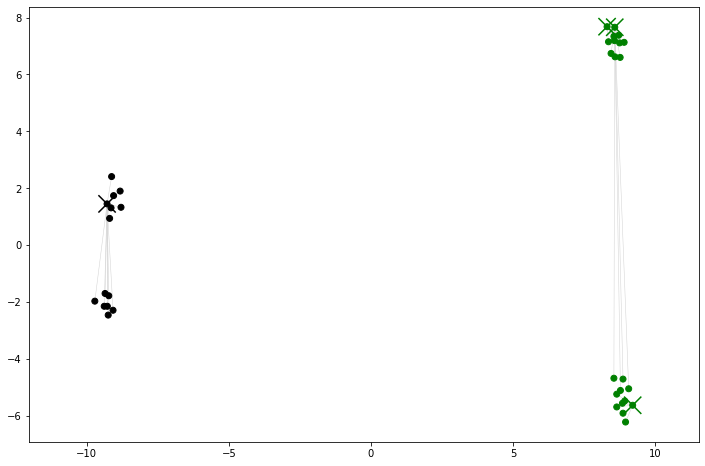

In [16]:
model.plot2d()

In [17]:
model.load_space_from_file("test.3dspace") # expected is optional. Default is 1000.
model.privacy_bound = 2


**** Successfully loaded 14 points/colors (dimension: 3) from 'test.3dspace'


In [18]:
model.compute_clustering()

  - Phase 1 done (time: 3.272µs): Determined k = 4 centers by the Gonzales heuristic.
  - Phase 2 done (time: 102.638µs): Determined k = 4 clusterings.
  - Phase 3 done (time: 16.51µs): Determined opening lists.
  - Phase 4 done (time: 312.103µs with 8 threads on 8 cores): Determined new centers. Number of flow problem solved: 4.
  - Phase 5 done (time: 54.309µs): Created assignments and chose the final clustering (based on C_3).
**** Algorithm done (total time: 493.018µs): Privacy-preserving representative k-center computed. Number of centers: 4; final radius: 9.818452.


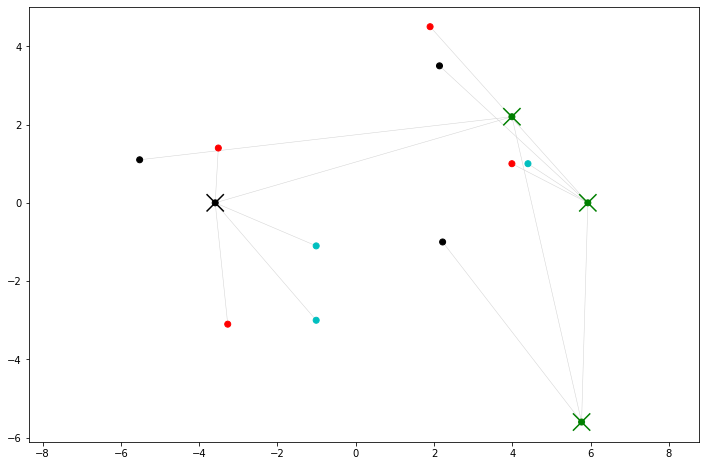

In [19]:
model.plot2d(x_dim=0, y_dim=2) # as we are in 3d now, we have to specify which dimensions should be displayed. Default is x_dim=1 and y_dim=1.

In [40]:
model.save_clustering_to_file("test.clustering")

For given centers we can run phase 2 to obtain a private assignment:

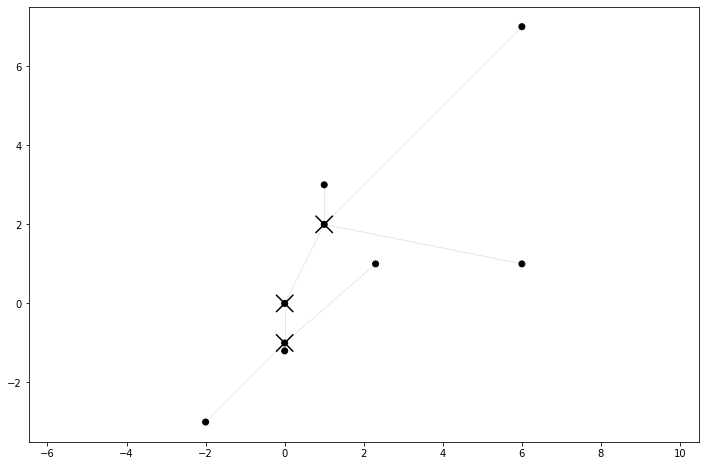

In [19]:
model2 = FFKCenter(4,privacy_bound = 3) # note that this k=4 will be ignored, as we provide centers instead
pos = [[1,2],[0,0],[6,7],[0,-1],[-2,-3],[0,-1.2],[1,3],[6,1],[2.3,1]]
colors = [0] * len(pos) # color data needs to be provided but will be ignored
model2.insert(pos,colors)
model2.private_assignment_by_centers([0,1,3])
model2.plot2d()